In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [5]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [7]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [8]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

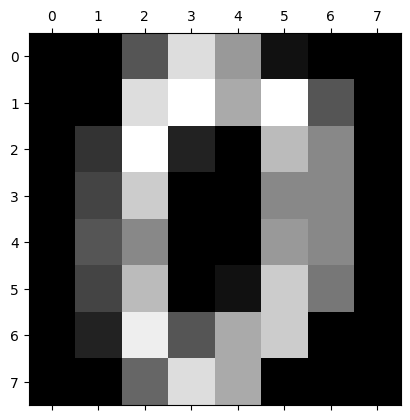

In [10]:
plt.gray()
plt.matshow(digits.images[0])

In [17]:
digits.target[0:12]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1])

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
 x_train, x_test, y_train, y_test = train_test_split(digits.data , digits.target, test_size= 0.2)

In [23]:
len(x_train)

1437

In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [26]:
model.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
model.score(x_test, y_test)

0.9666666666666667

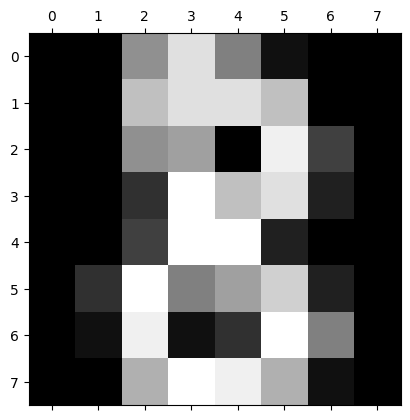

In [31]:
plt.matshow(digits.images[8])

In [33]:
model.predict([digits.data[67]])

array([6])

In [35]:
model.predict(digits.data[0:8])

array([0, 1, 2, 3, 4, 5, 6, 7])

In [36]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_predicted)
cm

array([[38,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 35,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 32,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  1,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 33]])

<Axes: >

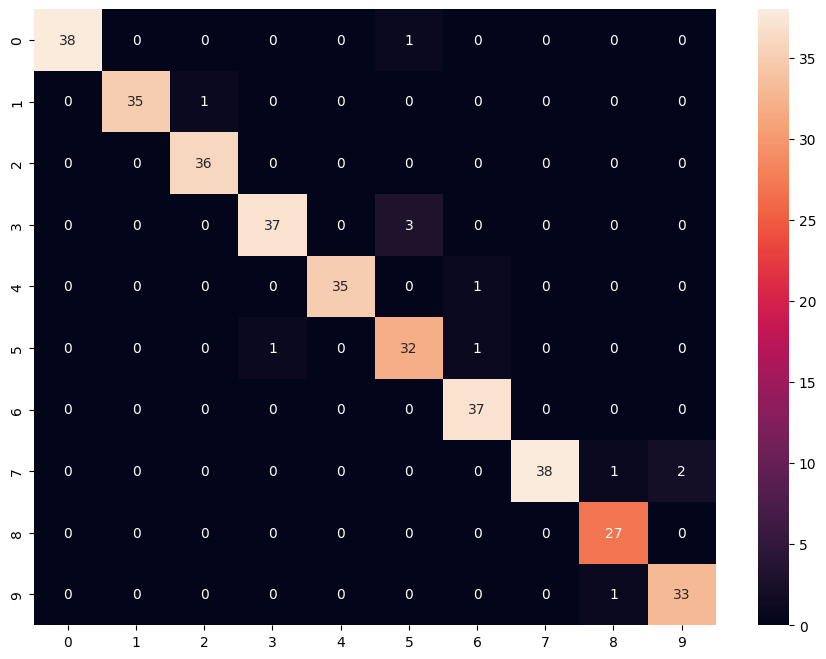

In [37]:
import seaborn as sn
plt.figure(figsize = (11,8))
sn.heatmap(cm,annot = True)
